# A Complete Navigation System
In this notebook, we will be implementing all the concepts we have learned in this 4 week course.

In [1428]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys
import math as m
%matplotlib inline

### Lets load the world enviornment into our system

In [1429]:
map = """@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTTTTTTTT@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTTTTTTTTTTTTTTTTTTTTTTTTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTTTTT.....TTTT.......TTTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT..T.....T@@T......T@@TT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT..T..T.TT@@T......T@TTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT........TTTT.......TTTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT.....T.T............TTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT....................TTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT....................TTT
@TTTTTTTTTTTTTTT......TTTTTTTTTTTTTTT@@@TTT....................TTT
TTTTTT..TTT@TTTTTT..TTTTTTTTTTTTT..TT@@@TTT.....................TT
TTTT....TTTTTTTTTT..TTTTTTTTTTTTT..TT@@@TT.....TTTT.............TT
TTTT....TTTT...TTT..TTTTT..........TTT@@TT.....TTTTTTT..........TT
TTTT.....TT...........TTT...........TT@@TT.....TTTTTTT..........TT
TT....................TTT...........TT@@TT.....TTTTTTT..........TT
TT..................................TT@@TT......................TT
TT..................................TT@@TT......................TT
TTT.................................TT@@TT......................TT
TTT.................................TT@@TT......................TT
TTT.................................TT@@TT......................TT
TTT.................................TT@@TT......................TT
TT..................................T@@@TT.......TTT..TTTT......TT
@T..................................T@@@TTTTTTTTTTTT..TTTTTTTTTTTT
@T..................................TTTTTTTTTTTTTTTT..TTTTTTTTTTTT
@T..................................TTTTT.......TTTT..TTTT@@@@@@TT
@T....................................TTT...............TTTT@@@@TT
@T....................................TTT...............TTTT@TTTTT
@T.......................................................TTTTTTTTT
@T..............................................................TT
@T..............................................................TT
@T..............................................................TT
@T..............................................................TT
@T..........TT......TT......TT..................................TT
@T..........TT......TT......TT..................................TT
@T...................T..........................................TT
@T...........................TTTTTTT...........TTTT.............TT
TT...........................TTTTTTT...........TTTT.............TT
TT.............................................TTTT.............TT
TT.......TTTTTTTT..............................TTTT...........TTTT
TT.......TTTTTTTT.............................................TTTT
TT....................................TT......................TTTT
TT....................................TT........................TT
TT....................................TT........................TT
TT..............................................................TT
TT..............................................................TT
TT..............................................................TT
TT..............................................................TT
TT.............................................TTTT.............TT
TT.............................................TTTT.............TT
TT.............................................TTTT.............TT
TT....................................TT.......TTTT....TTTTT....TT
TT....................................TT...............TTTTT....TT
TT....................................TT...............TTTT..TTTTT
TT.....................................................TTTTTTTTTTT
TT.....................................................TTTTTTTTTTT
TT.....................................................TTTT@@TTTTT
@T....TT..........TT.......TTT............................TTTTTTTT
@T....TT..........TT......TTTT............................TTTTTTTT
@T....TT..........TT......TTTT..........................TTTT@@@@@@
@T.....................................................TTTTT@@@@@@
@T.................................TTT....TTTTTTT.......TT@@@@@@@@
@TT........TT.............T.....TTTTTTTTTTTTTTTTTTTTTTTTTT@@@@@@@@"""

Visualize the graph: 

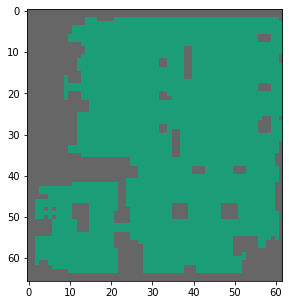

In [1430]:
map_img = [[0 if ch =="." else 1 for ch in row] for row in map.splitlines()]
map_img = np.array(map_img)

grid_size = np.array(map_img.shape)   # Get shape of grid
# print(grid_size)
grid_res = 1
#use shape and grid_res to calculate the top-right vertex
grid_size = map_img.shape

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(map_img.T, cmap = plt.cm.Dark2)
plt.show()

!NOTE! map_img.T is used for all plotting to match the map_img matrix index with the output graph

In [1431]:
# print(map_img)

### Generate A* Path

Remove all occupied nodes:

In [1432]:
G = nx.generators.lattice.grid_2d_graph(*grid_size)
deleted_nodes = 0 # counter to keep track of deleted nodes
for i in range(grid_size[0]):
    for j in range(grid_size[1]):
        if map_img[i,j]:
            G.remove_node((i,j))
            deleted_nodes+=1
#loop to remove nodes

print(f"removed {deleted_nodes} nodes")

removed 1264 nodes


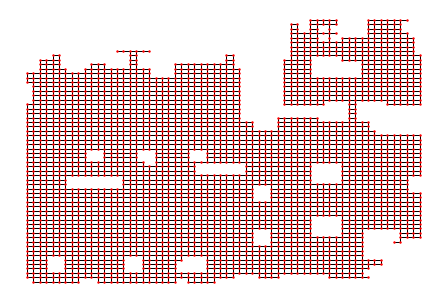

In [1433]:
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, node_color='red', node_size=2)

Write the Euclidean function that takes in the node x, y and compute the distance:

In [1434]:
def euclidean(node1, node2):
  x1, y1 = node1
  x2, y2 = node2
  return np.sqrt((x1-x2)**2 + (y1-y2)**2)

Enter your start and goal coordinates:

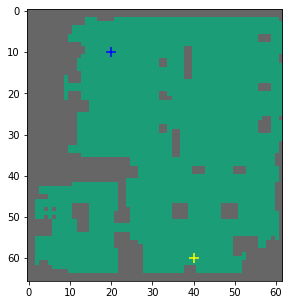

In [1435]:
start = (20, 10)
goal = (40, 60)


ig, ax = plt.subplots(figsize=(5,5))
ax.imshow(map_img.T, cmap = plt.cm.Dark2)
ax.scatter(start[0],start[1], marker = "+", color = "blue", s = 100, label="start")
ax.scatter(goal[0],goal[1], marker = "+", color = "yellow", s = 100, label="goal")
plt.show()

Computation for A* path in the given map:

In [1436]:
nx.set_edge_attributes(G,1,"cost")
astar_path = nx.astar_path(G,start,goal,heuristic=euclidean, weight="cost")
astar_path = np.array(astar_path)
# print(astar_path)

Plot the output A* path computed:

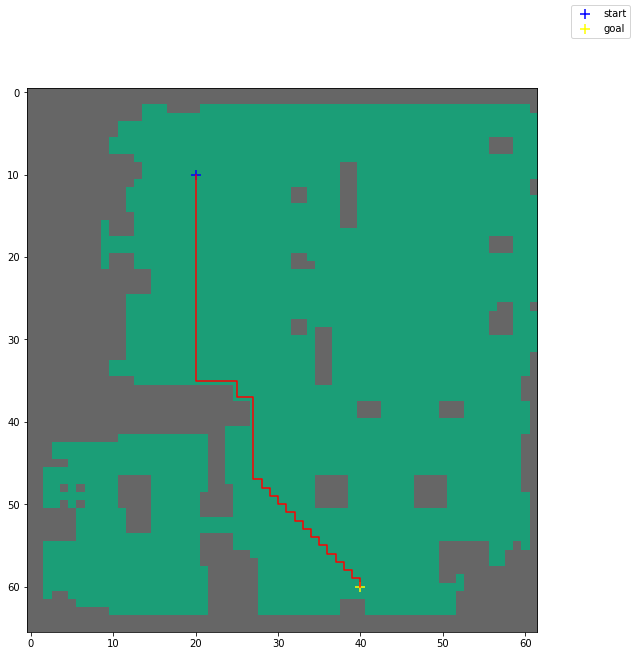

In [1437]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(map_img.T ,cmap=plt.cm.Dark2)
ax.scatter(start[0],start[1], marker = "+", color = "blue", s = 100, label="start")
ax.scatter(goal[0],goal[1], marker = "+", color = "yellow", s = 100, label="goal")
ax.plot(astar_path[:,0],astar_path[:,1],"r")
fig.show()
fig.legend()

### Smoothen generated A* path

Define the functions required to generate smooth path

In [1438]:
# Define turn radius
r = 0.5   # Turn radius of 0.5 m works best
v = (1/3.0152)*r  
dt = 0.1
num_st_pts = int(1/dt)
num_pts = 5

def cubic_spiral(theta_i, theta_f, n=50):
    x = np.linspace(0, 1, num=n)
    return (theta_f-theta_i)*(-2*x**3 + 3*x**2) + theta_i
    
def straight(dist, curr_pose, n=num_st_pts):
    x0, y0, t0 = curr_pose
    xf, yf = x0 + dist*np.cos(t0), y0 + dist*np.sin(t0)
    x = (xf - x0) * np.linspace(0, 1, n) + x0
    y = (yf - y0) * np.linspace(0, 1, n) + y0
    return x, y, t0*np.ones_like(x)

def turn(change, curr_pose, n=num_pts):
     x0, y0, t0 = curr_pose
     theta = cubic_spiral(t0, t0 + np.deg2rad(change), n)
     # cumsum() is basically integration
     x= x0 + np.cumsum(v*np.cos(theta)*dt)
     y= y0 + np.cumsum(v*np.sin(theta)*dt)
     return x, y, theta

def generate_trajectory(route, init_pose = (0, 0,np.pi/2)):
    curr_pose = init_pose
    func = {'straight': straight, 'turn': turn}
    x, y, t = np.array([]), np.array([]),np.array([])
    for manoeuvre, command in route:
        px, py, pt = func[manoeuvre](command, curr_pose)
        curr_pose = px[-1],py[-1],pt[-1]  # Pull last element of px, py, pt to get latest orientation
        # Add latest pose to array
        x, y, t = np.concatenate([x, px]), np.concatenate([y, py]), np.concatenate([t, pt])
    return x, y, t

def rough_trajectory(route, init_pose):
  curr_pose = init_pose
  func = {'straight': straight, 'turn': turn}
  x, y, t = np.array([]), np.array([]),np.array([])
  for manoeuvre, command in route:
      px, py, pt = func[manoeuvre](command, curr_pose)
      curr_pose = px[-1],py[-1],pt[-1]  # Pull last element of px, py, pt to get latest orientation
      # Add latest pose to array
      x, y, t = np.concatenate([x, px]), np.concatenate([y, py]), np.concatenate([t, pt])
  return x[-1], y[-1], t[-1]

[[20, 35, -90], [25, 35, 90], [25, 37, -90], [27, 37, 90], [27, 47, -90], [28, 47, 90], [28, 48, -90], [29, 48, 90], [29, 49, -90], [30, 49, 90], [30, 50, -90], [31, 50, 90], [31, 51, -90], [32, 51, 90], [32, 52, -90], [33, 52, 90], [33, 53, -90], [34, 53, 90], [34, 54, -90], [35, 54, 90], [35, 55, -90], [36, 55, 90], [36, 56, -90], [37, 56, 90], [37, 57, -90], [38, 57, 90], [38, 58, -90], [39, 58, 90], [39, 59, -90], [40, 59, 90]]


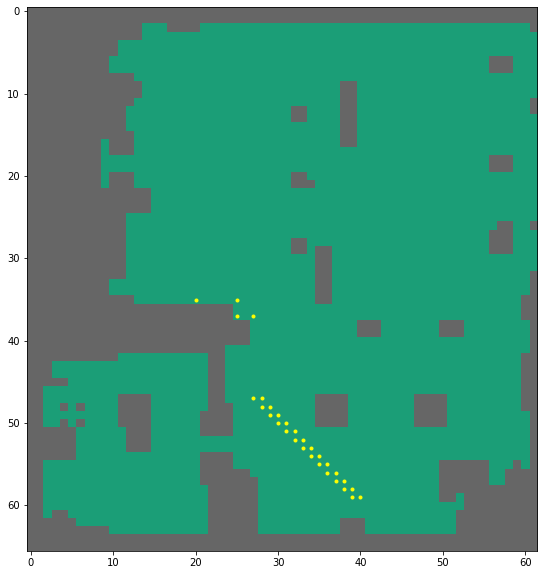

In [1439]:
path_x = []
path_y = [] 
for i,j in astar_path:
  path_x.append(i)
  path_y.append(j)

corners = []
for x1,x2,x3, y1,y2,y3 in zip(path_x[:-2],path_x[1:-1],path_x[2:],path_y[:-2],path_y[1:-1],path_y[2:]):
  slope = (x2-x1)*(y3-y2) - (x3-x2)*(y2-y1)
  if slope > 0.0:   # Turn left, change in theta is pi/2
    corners.append([x2, y2, 90])
  if slope < 0.0:   # Turn right, change in theta is -pi/2
    corners.append([x2, y2, -90])
print(corners)
if not corners:
  corners.append([goal[0], goal[1], 90])

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(map_img.T ,cmap=plt.cm.Dark2)
for i,j, _ in corners:  # Plot corners for better visualization
  ax.plot(i,j,'.', color="yellow")
fig.show()

In [1440]:
print(corners)

[[20, 35, -90], [25, 35, 90], [25, 37, -90], [27, 37, 90], [27, 47, -90], [28, 47, 90], [28, 48, -90], [29, 48, 90], [29, 49, -90], [30, 49, 90], [30, 50, -90], [31, 50, 90], [31, 51, -90], [32, 51, 90], [32, 52, -90], [33, 52, 90], [33, 53, -90], [34, 53, 90], [34, 54, -90], [35, 54, 90], [35, 55, -90], [36, 55, 90], [36, 56, -90], [37, 56, 90], [37, 57, -90], [38, 57, 90], [38, 58, -90], [39, 58, 90], [39, 59, -90], [40, 59, 90]]


In [1441]:
if start[1] == corners[0][1]: 
  if start[0] > corners[0][0]: theta = np.pi
  else: theta = 0
elif start[0] == corners[0][0]: 
  if start[1] > corners[0][1]: theta = -np.pi/2
  else: theta = np.pi/2

# print(theta)

In [1442]:
start_pose = [start[0], start[1], theta]
route = []
xc, yc, tc = start_pose
for xp, yp, tp in corners:
  straight_distance = np.sqrt((xc-xp)**2  + (yc-yp)**2) - r
  if straight_distance < 0: straight_distance = 0 
  route.append(("straight", straight_distance))   # Add straight line distance
  route.append(("turn", tp))   # Add turn angle
  latest_pose = [xc, yc, tc]
  xc, yc, tc = rough_trajectory(route, start_pose)

xf, yf, _ = rough_trajectory(route, start_pose)
buffer_dist = np.sqrt((xf-goal[0])**2  + (yf-goal[1])**2)
if buffer_dist <= 0.1: buffer_dist = 0
route.append(("straight", buffer_dist))
print(route)

[('straight', 24.5), ('turn', -90), ('straight', 4.472125643625084), ('turn', 90), ('straight', 1.941501849036773), ('turn', -90), ('straight', 1.9181732182314448), ('turn', 90), ('straight', 9.873150193974404), ('turn', -90), ('straight', 0.9376167805632487), ('turn', 90), ('straight', 0.9460519388921567), ('turn', -90), ('straight', 0.8919335190415962), ('turn', 90), ('straight', 0.9078081320778097), ('turn', -90), ('straight', 0.9013616832214546), ('turn', 90), ('straight', 0.903841358018088), ('turn', -90), ('straight', 0.9028867531745595), ('turn', 90), ('straight', 0.9032561639474821), ('turn', -90), ('straight', 0.903113709104358), ('turn', 90), ('straight', 0.9031687398944737), ('turn', -90), ('straight', 0.9031474980176559), ('turn', 90), ('straight', 0.9031557001105286), ('turn', -90), ('straight', 0.9031525334819153), ('turn', 90), ('straight', 0.903153756107387), ('turn', -90), ('straight', 0.9031532840657839), ('turn', 90), ('straight', 0.9031534663171725), ('turn', -90), 

Plot the smooth path

460


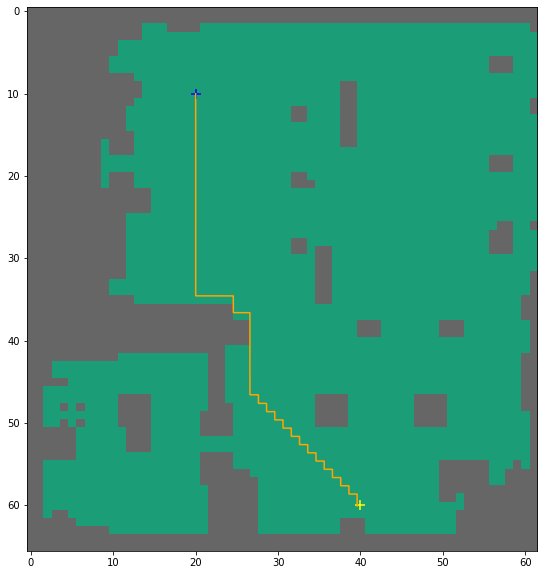

In [1443]:
x_path, y_path, thetas = generate_trajectory(route, start_pose)
ref_path = []
for i, j, k in zip(x_path, y_path, thetas):
  ref_path.append([i, j, k])
ref_path = np.array(ref_path)
print(len(ref_path))    #simulate vehicle for 1 step
    # remember the function now returns a trajectory, not a single pose
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(map_img.T ,cmap=plt.cm.Dark2)
ax.scatter(start[0],start[1], marker = "+", color = "blue", s = 100)
ax.scatter(goal[0],goal[1], marker = "+", color = "yellow", s = 100)
# ax.plot(astar_path[:,0],astar_path[:,1],"r")
ax.plot(ref_path[:,0], ref_path[:,1], c = "orange")
fig.show()

Thus we have obtained our smooth path to track

In [1444]:
# print(ref_path)

### Following the reference path

In [1445]:
import time

Initialize collision checking function:

In [1446]:
r = 1
l = 0.6
# circles = (x coordinate, y coordinate, radius)
circles = [(0, 0, r), (0, l, r), (0, -l, r)]

def circle_collision_check(grid, local_traj):
    """ Returns if local_traj has any collisions """
    xmax, ymax = grid.shape
    all_x = np.arange(xmax)
    all_y = np.arange(ymax)
    X, Y = np.meshgrid(all_x, all_y)
    for xl, yl, tl in local_traj:
      rot = np.array([[np.sin(tl), -np.cos(tl)],
                      [np.cos(tl),  np.sin(tl)]])   # Rotational matrix
      for xc, yc, rc in circles:
        xc_rot, yc_rot = rot @ np.array([xc, yc]) + np.array([xl, yl])
        xc_pix, yc_pix = int(xc_rot/grid_res), int(yc_rot/ grid_res)   # Get the actual coordinates
        rc_pix = (rc/ grid_res)
        inside_circle = ((X-xc_pix)**2 +(Y-yc_pix)**2 - rc_pix**2 < 0)   # Return points within the radii of the vehicle
        occupied_pt = grid[X, Y] == 1   # Get all the occupied points
        if np.sum(np.multiply( inside_circle, occupied_pt)):   # Check if those points within the radii contain any obstacles
          return True
    return False

Test collision checking using a basic trajectory which collides:

False


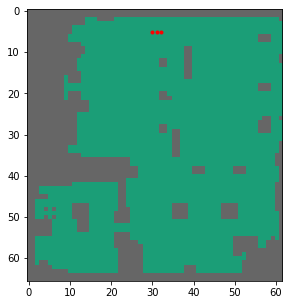

In [1447]:
# Define few test trajectories
local_traj = np.array([[30, 5, np.pi/2], [31, 5, np.pi/2], [32, 5, np.pi/2]])   # Should return False 
# local_traj = np.array([[10, 30, np.pi/2], [11, 30, np.pi/2], [12, 30, np.pi/2]])   # Should return True
print(circle_collision_check(map_img, local_traj))

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(map_img.T ,cmap=plt.cm.Dark2)
ax.plot(local_traj[:,0], local_traj[:,1], '.', c='r')
fig.show()

Initialize the lidar class

In [1448]:
class Lidar(object):
    def __init__(self, nbeams=8, fov=60, max_dist=5.0, sampling_pts=20):
        #nbeams = number of sensing beams
        #FOV = field-of-view of Lidar/ coverage in degrees
        #max_dist = maximum distance Lidar can sense
        #sampling_pts = num pts on a given beam for obstacle check
        self.beam_angles = np.deg2rad(np.linspace(-fov/2+np.pi/2,fov/2+np.pi/2,num=nbeams))
        self.line_sampler = max_dist * np.linspace(0, 1, num=sampling_pts)
    
    def set_env(self, grid, grid_res=0.05):
        #2-D occupancy grid and grid_resolution
        self.grid = grid
        self.grid_res = grid_res
    
    def sense_obstacles(self, pose):
        xc, yc, theta = pose
        beam_data = []
        for b in self.beam_angles:
            direction = np.array([np.cos(theta+b), np.sin(theta+b)])
            for d in self.line_sampler:
                beam_x, beam_y = np.array([xc, yc]) + d * direction
                i, j = int(beam_x/self.grid_res), int(beam_y/self.grid_res)
                if self.grid[i][j] == 1:
                    break
            beam_data.append(d)
        return beam_data

In [1449]:
def simulate_unicycle(pose, v,w, N=1, dt=0.1):
    """ Returns N poses for given pose, v, w """
    x, y, t = pose
    poses = []
    for _ in range(N):
        x += v*np.cos(t)*dt
        y += v*np.sin(t)*dt
        t += w*dt
        poses.append([x,y,t])   
    return poses

Define few parameters for the unicycle

In [1450]:
dt = 0.1   # 1 / planner update frequency
V_MAX = 1   # Maximum velocity (m/s)
MIN_DIST = 1.0   # Minimum stopping distance
ACC_MAX = 0.4   # Maximum linear acceleration (m/s^2)
LATERAL_ACC_MAX = 1.5   # Maximum lateral acceleration (m/s^2)
goal_threshold = 0.05
pred_horizon=10
w_cte = 1.0
w_speed = 1.0
W_MAX = 1
W_DOT_MAX = 2.8
K_MAX = 0.5   # Maximum turn radius 

In [1451]:
def command_window(v, w, dt=0.1):
    """Returns acceptable v,w commands given current v,w"""
    v_max = min(V_MAX, v + ACC_MAX*dt)   
    v_min = max(0, v - ACC_MAX*dt)   

    w_max = min(W_MAX, w + W_DOT_MAX*dt)
    w_min = max(-W_MAX, w - W_DOT_MAX*dt)
    
    vs = np.linspace(v_min, v_max, num=10)
    ws = np.linspace(w_min, w_max, num=20)

    commands = np.transpose([np.tile(vs, len(ws)), np.repeat(ws, len(vs))])   # Cartesian product
    epsilon = 1e-6
    kappa = (commands[:,1]) / (commands[:,0] + epsilon)   
    
    return commands[(kappa < K_MAX) & (commands[:, 0] != 0)]

In [1452]:
nbeams = 10
max_dist = 5
fov = 80
lidar = Lidar(nbeams=nbeams, fov=fov, max_dist=max_dist)
lidar.set_env(map_img, grid_res=1)
def track(ref_path, pose, v, w, grid_data, dt=0.1):
    """ returns best (v, w) which avoids obstacles """
    global collision_check
    global breaker
    commands = command_window(v, w, dt)

    dist = lidar.sense_obstacles(pose=pose)
    # print(dist)

    neg_w_distances = np.sum(dist[:5])/(nbeams/2)
    # print("neg_w_distances = ", neg_w_distances)

    pos_w_distances = np.sum(dist[5:])/(nbeams/2)
    # print("pos_w_distances = ", pos_w_distances)

    # heuristic_cost = 0
    heuristic_cost = np.abs(pos_w_distances - neg_w_distances)

    if pos_w_distances > neg_w_distances: 
      collision_check = True
      pos_w, neg_w = True, False

    if neg_w_distances > pos_w_distances: 
      collision_check = True
      pos_w, neg_w = False, True

    if neg_w_distances == max_dist and pos_w_distances == max_dist and pos_w_distances == neg_w_distances:
      collision_check = False
      pos_w, neg_w = False, False
    elif neg_w_distances != max_dist and pos_w_distances != max_dist and pos_w_distances == neg_w_distances:
      collision_check = True
      pos_w, neg_w = False, False
    
    print(f"\n Tracked point: {np.round(ref_path[-1][0])}, {np.round(ref_path[-1][1], 2)}")   # Print which point is being tracked
    cte = np.inf
    best_cost, best_command = np.inf, None
    for i, (v, w) in enumerate(commands):
        local_path = simulate_unicycle(pose, v, w, pred_horizon+10)   # Number of steps = prediction horizon 

        if collision_check:
          if circle_collision_check(grid_data, local_path): #ignore colliding paths
              # print("  local path has a collision \n")
              continue

        cte = np.sqrt((ref_path[-1][0]-local_path[-1][0])**2 + (ref_path[-1][1]-local_path[-1][1])**2)

        if neg_w and w > 0:
          cost = w_cte*cte + w_speed*(V_MAX - v)**2  + heuristic_cost

        elif pos_w and w < 0:
          cost = w_cte*cte + w_speed*(V_MAX - v)**2  + heuristic_cost
        
        else:
          cost = w_cte*cte + w_speed*(V_MAX - v)**2

        #check if there is a better candidate
        if abs(w) < 0.05: w = 0
        if cost <= best_cost:
            best_cost, best_command, sl = cost, [v, w], i+1

    if best_command:
        return best_command
    else:
        breaker = True
        return [0, 0]
    # return best_command

In [1453]:
start_pose = [start[0], start[1], theta]

# Obtain final point for collsion avoidance
final_x, final_y = ref_path[-1][0], ref_path[-1][1]
goal_index, path_index = 10, 0
pose = start_pose
logs = []
v, w = 0.0, 0.0
iterations = 1
iter_time = 0
collision_check = False
breaker = False
# error_correction = 10

while np.sqrt((ref_path[-1][0]-pose[0])**2 + (ref_path[-1][1]-pose[1])**2) > goal_threshold*25:
    if collision_check: error_correction = 200
    else: error_correction = 200

    print(f"iteration: {iterations}")
    t0 = time.time()
    if len(ref_path) <= goal_index:
      # print("true")
      local_ref_path = ref_path

    else:
      # local_ref_path = ref_path[path_index:path_index+pred_horizon]
      local_ref_path = np.round(ref_path[path_index:path_index+goal_index+10], 3)
      curr_x, curr_y = pose[0], pose[1]
      local_x, local_y = local_ref_path[-1][0], local_ref_path[-1][1]
      # update path_index using current pose and local_ref_path
      if np.sqrt((local_x-curr_x)**2 + (local_y-curr_y)**2) < goal_threshold*error_correction and path_index != len(ref_path)-1:
        path_index = path_index + 1

     
    # get next command
    v, w = track(local_ref_path, pose, v, w, map_img)
    
    pose = simulate_unicycle(tuple(pose), v, w)
    pose = pose[0]

    print(f" {np.round(pose[0],2)}, {np.round(pose[1],2)}, {np.round(pose[2], 2)} ")

    logs.append([*pose, v, w])
    t1 = time.time() #simplest way to time-profile your code
    print(f"idx:{path_index}, v:{v:0.3f}, w:{w:0.3f}, time:{(t1-t0) * 1000:0.1f}ms \n")
    iter_time = iter_time + (t1-t0)
    iterations = iterations+1
    if breaker: 
      print("!!! COLLISION !!!")
      break
if not breaker:
  print("!!! SIMULATION COMPLETE !!!")
print(f"average time for 1 iteration: {np.round(iter_time/iterations,5)} s")
print(f"Total time for simulation: {iter_time} s")

iteration: 1

 Tracked point: 22.0, 34.55
 20.0, 10.0, 1.56 
idx:0, v:0.040, w:-0.074, time:21.7ms 

iteration: 2

 Tracked point: 22.0, 34.55
 20.0, 10.01, 1.56 
idx:0, v:0.080, w:-0.059, time:15.7ms 

iteration: 3

 Tracked point: 22.0, 34.55
 20.0, 10.02, 1.56 
idx:0, v:0.120, w:0.000, time:16.4ms 

iteration: 4

 Tracked point: 22.0, 34.55
 20.0, 10.04, 1.56 
idx:0, v:0.160, w:0.000, time:15.2ms 

iteration: 5

 Tracked point: 22.0, 34.55
 20.0, 10.06, 1.56 
idx:0, v:0.200, w:0.000, time:15.6ms 

iteration: 6

 Tracked point: 22.0, 34.55
 20.0, 10.08, 1.56 
idx:0, v:0.240, w:0.000, time:19.1ms 

iteration: 7

 Tracked point: 22.0, 34.55
 20.0, 10.11, 1.56 
idx:0, v:0.280, w:0.000, time:20.5ms 

iteration: 8

 Tracked point: 22.0, 34.55
 20.0, 10.14, 1.56 
idx:0, v:0.320, w:0.000, time:21.6ms 

iteration: 9

 Tracked point: 22.0, 34.55
 20.0, 10.18, 1.56 
idx:0, v:0.360, w:0.000, time:19.2ms 

iteration: 10

 Tracked point: 22.0, 34.55
 20.0, 10.22, 1.56 
idx:0, v:0.400, w:0.000, ti

In [1454]:
# print(map_img[23,53])

In [1455]:
# test_pose = [25, 52, np.pi]
# lo_path = simulate_unicycle(test_pose, 0.018, 0.026, 100)
# print(lo_path)

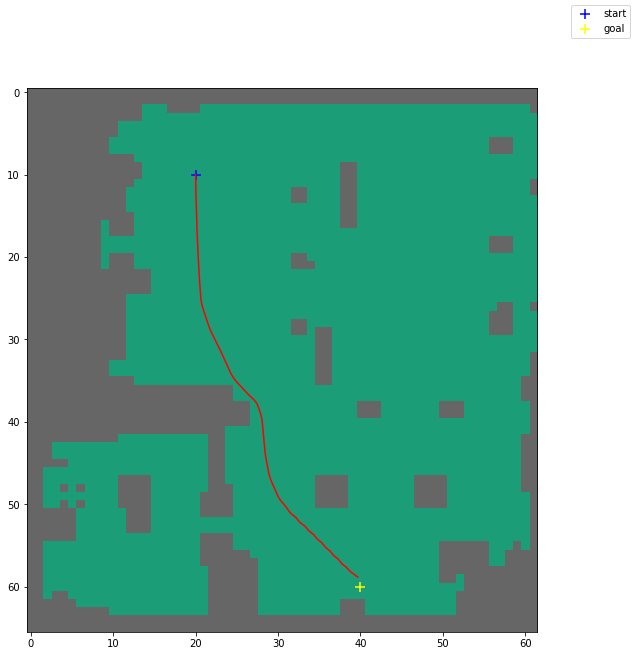

In [1456]:
poses = np.array(logs)[:,:3]
tracked = np.array(tracked)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(map_img.T ,cmap=plt.cm.Dark2)
ax.scatter(start[0],start[1], marker = "+", color = "blue", s = 100, label="start")
ax.scatter(goal[0],goal[1], marker = "+", color = "yellow", s = 100, label="goal")
# ax.plot(astar_path[:,0],astar_path[:,1],"b")
# ax.plot(ref_path[:,0], ref_path[:,1], c='orange')
plt.plot(poses[:,0], poses[:,1], c='r')
fig.show()
fig.legend()

### Dynamic avoidance

We will now add a random object in the path of the bot and observe its behaviour

In [1457]:
adjusted_map = """@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTTTTTTTT@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTTTTTTTTTTTTTTTTTTTTTTTTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTTTTT.....TTTT.......TTTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT..T.....T@@T......T@@TT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT..T..T.TT@@T......T@TTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT........TTTT.......TTTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT.....T.T............TTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT....................TTT
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@TTT....................TTT
@TTTTTTTTTTTTTTT......TTTTTTTTTTTTTTT@@@TTT....................TTT
TTTTTT..TTT@TTTTTT..TTTTTTTTTTTTT..TT@@@TTT.....................TT
TTTT....TTTTTTTTTT..TTTTTTTTTTTTT..TT@@@TT.....TTTT.............TT
TTTT....TTTT...TTT..TTTTT..........TTT@@TT.....TTTTTTT..........TT
TTTT.....TT...........TTT...........TT@@TT.....TTTTTTT..........TT
TT....................TTT...........TT@@TT.....TTTTTTT..........TT
TT..................................TT@@TT......................TT
TT..................................TT@@TT......................TT
TTT.................................TT@@TT......................TT
TTT...............XXXX..............TT@@TT......................TT
TTT...............XXXX..............TT@@TT......................TT
TTT...............XXXX..............TT@@TT......................TT
TT..................................T@@@TT.......TTT..TTTT......TT
@T..................................T@@@TTTTTTTTTTTT..TTTTTTTTTTTT
@T..................................TTTTTTTTTTTTTTTT..TTTTTTTTTTTT
@T..................................TTTTT.......TTTT..TTTT@@@@@@TT
@T....................................TTT...............TTTT@@@@TT
@T....................................TTT...............TTTT@TTTTT
@T.......................................................TTTTTTTTT
@T..............................................................TT
@T..............................................................TT
@T...............................................XXX............TT
@T................................................XX............TT
@T..........TT......TT......TT..................................TT
@T..........TT......TT......TT..................................TT
@T...................T..........................................TT
@T...........................TTTTTTT...........TTTT.............TT
TT...........................TTTTTTT...........TTTT.............TT
TT.............................................TTTT.............TT
TT.......TTTTTTTT..............................TTTT...........TTTT
TT.......TTTTTTTT.............................................TTTT
TT....................................TT......................TTTT
TT....................................TT........................TT
TT....................................TT........................TT
TT..............................................................TT
TT..............................................................TT
TT..............................................................TT
TT..............................................................TT
TT.............................................TTTT.............TT
TT.............................................TTTT.............TT
TT.............................................TTTT.............TT
TT....................................TT.......TTTT....TTTTT....TT
TT....................................TT...............TTTTT....TT
TT....................................TT...............TTTT..TTTTT
TT.....................................................TTTTTTTTTTT
TT.....................................................TTTTTTTTTTT
TT.....................................................TTTT@@TTTTT
@T....TT..........TT.......TTT............................TTTTTTTT
@T....TT..........TT......TTTT............................TTTTTTTT
@T....TT..........TT......TTTT..........................TTTT@@@@@@
@T.....................................................TTTTT@@@@@@
@T.................................TTT....TTTTTTT.......TT@@@@@@@@
@TT........TT.............T.....TTTTTTTTTTTTTTTTTTTTTTTTTT@@@@@@@@"""

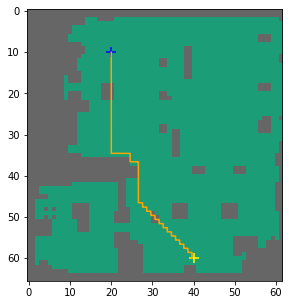

In [1458]:
adjusted_img = [[0 if ch =="." else 1 for ch in row] for row in adjusted_map.splitlines()]
adjusted_img = np.array(adjusted_img)

grid_size = np.array(adjusted_img.shape)   # Get shape of grid
# print(grid_size)
grid_res = 1
#use shape and grid_res to calculate the top-right vertex

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(adjusted_img.T, cmap = plt.cm.Dark2)
ax.scatter(start[0],start[1], marker = "+", color = "blue", s = 100)
ax.scatter(goal[0],goal[1], marker = "+", color = "yellow", s = 100)
ax.plot(ref_path[:,0], ref_path[:,1], c = "orange")
plt.show()

Now we repeat the same steps again

In [1459]:
nbeams = 10
max_dist = 5
fov = 80
lidar = Lidar(nbeams=nbeams, fov=fov, max_dist=max_dist)
lidar.set_env(adjusted_img, grid_res=1)

In [1460]:
# dt = 0.1   # 1 / planner update frequency
# V_MAX = 1   # Maximum velocity (m/s)
# MIN_DIST = 1.0   # Minimum stopping distance
# ACC_MAX = 0.4   # Maximum linear acceleration (m/s^2)
# LATERAL_ACC_MAX = 1.5   # Maximum lateral acceleration (m/s^2)
# goal_threshold = 0.05
# pred_horizon=10
# w_cte = 1.0
# w_speed = 1.0
# W_MAX = 1
# W_DOT_MAX = 3
# K_MAX = 2   # Maximum turn radius 

dt = 0.1   # 1 / planner update frequency
V_MAX = 1   # Maximum velocity (m/s)
MIN_DIST = 1.0   # Minimum stopping distance
ACC_MAX = 0.4   # Maximum linear acceleration (m/s^2)
LATERAL_ACC_MAX = 1.5   # Maximum lateral acceleration (m/s^2)
goal_threshold = 0.05
pred_horizon=10
w_cte = 1.0
w_speed = 1.0
W_MAX = 1
W_DOT_MAX = 2.8
K_MAX = 0.5   # Maximum turn radius 

In [1461]:
start_pose = [start[0], start[1], theta]

# Obtain final point for collsion avoidance
final_x, final_y = ref_path[-1][0], ref_path[-1][1]
goal_index, path_index = 10, 0
pose = start_pose
logs = []
v, w = 0.0, 0.0
iterations = 1
iter_time = 0
collision_check = False
breaker = False
# error_correction = 10

while np.sqrt((ref_path[-1][0]-pose[0])**2 + (ref_path[-1][1]-pose[1])**2) > goal_threshold*25:
    if collision_check: error_correction = 200
    else: error_correction = 200

    print(f"iteration: {iterations}")
    t0 = time.time()
    if len(ref_path) <= goal_index:
      # print("true")
      local_ref_path = ref_path

    else:
      # local_ref_path = ref_path[path_index:path_index+pred_horizon]
      local_ref_path = np.round(ref_path[path_index:path_index+goal_index+10], 3)
      curr_x, curr_y = pose[0], pose[1]
      local_x, local_y = local_ref_path[-1][0], local_ref_path[-1][1]
      # update path_index using current pose and local_ref_path
      if np.sqrt((local_x-curr_x)**2 + (local_y-curr_y)**2) < goal_threshold*error_correction and path_index != len(ref_path)-1:
        path_index = path_index + 1

     
    # get next command
    v, w = track(local_ref_path, pose, v, w, adjusted_img)
    
    pose = simulate_unicycle(tuple(pose), v, w)
    pose = pose[0]

    print(f" {np.round(pose[0],2)}, {np.round(pose[1],2)}, {np.round(pose[2], 2)} ")

    logs.append([*pose, v, w])
    t1 = time.time() #simplest way to time-profile your code
    print(f"idx:{path_index}, v:{v:0.3f}, w:{w:0.3f}, time:{(t1-t0) * 1000:0.1f}ms \n")
    iter_time = iter_time + (t1-t0)
    iterations = iterations+1
    if breaker: 
      print("!!! COLLISION !!!")
      break
if not breaker:
  print("!!! SIMULATION COMPLETE !!!")
print(f"average time for 1 iteration: {np.round(iter_time/iterations,5)} s")
print(f"Total time for simulation: {iter_time} s")

iteration: 1

 Tracked point: 22.0, 34.55
 20.0, 10.0, 1.56 
idx:0, v:0.040, w:-0.074, time:11.5ms 

iteration: 2

 Tracked point: 22.0, 34.55
 20.0, 10.01, 1.56 
idx:0, v:0.080, w:-0.059, time:14.5ms 

iteration: 3

 Tracked point: 22.0, 34.55
 20.0, 10.02, 1.56 
idx:0, v:0.120, w:0.000, time:16.6ms 

iteration: 4

 Tracked point: 22.0, 34.55
 20.0, 10.04, 1.56 
idx:0, v:0.160, w:0.000, time:15.8ms 

iteration: 5

 Tracked point: 22.0, 34.55
 20.0, 10.06, 1.56 
idx:0, v:0.200, w:0.000, time:15.4ms 

iteration: 6

 Tracked point: 22.0, 34.55
 20.0, 10.08, 1.56 
idx:0, v:0.240, w:0.000, time:17.1ms 

iteration: 7

 Tracked point: 22.0, 34.55
 20.0, 10.11, 1.56 
idx:0, v:0.280, w:0.000, time:17.9ms 

iteration: 8

 Tracked point: 22.0, 34.55
 20.0, 10.14, 1.56 
idx:0, v:0.320, w:0.000, time:18.8ms 

iteration: 9

 Tracked point: 22.0, 34.55
 20.0, 10.18, 1.56 
idx:0, v:0.360, w:0.000, time:19.6ms 

iteration: 10

 Tracked point: 22.0, 34.55
 20.0, 10.22, 1.56 
idx:0, v:0.400, w:0.000, ti

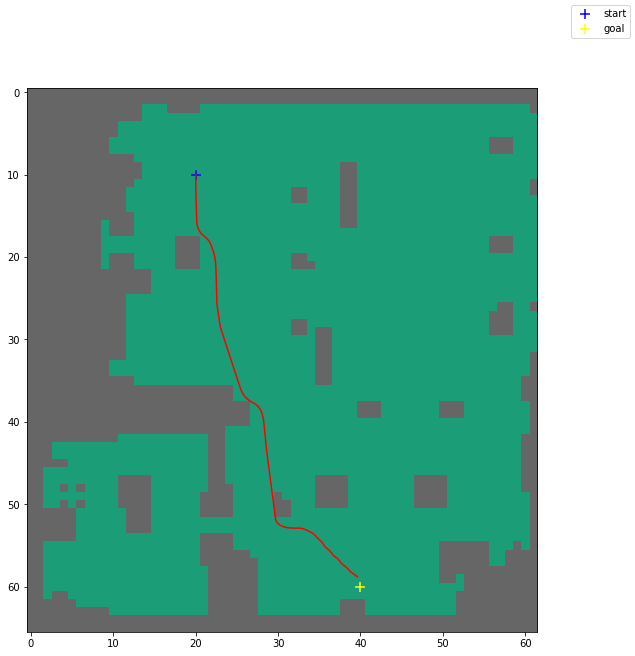

In [1464]:
poses = np.array(logs)[:,:3]
tracked = np.array(tracked)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(adjusted_img.T ,cmap=plt.cm.Dark2)
ax.scatter(start[0],start[1], marker = "+", color = "blue", s = 100, label="start")
ax.scatter(goal[0],goal[1], marker = "+", color = "yellow", s = 100, label="goal")
# ax.plot(astar_path[:,0],astar_path[:,1],"b")
# ax.plot(ref_path[:,0], ref_path[:,1], c='orange')
plt.plot(poses[:,0], poses[:,1], c='r')
fig.show()
fig.legend()